# Tenure Change in the City of Los Angeles from 2010 to 2019

## Research Question: Do parks in the city of Los Angeles have an effect on housing prices and change in tenure from 2010 to 2019?

My portion of the assignment is looking at renters/owners in the City of LA.I used the 2010 and 2019 ACS 5 year estimates to calculate the percent change in tenure in the City of Los Angeles. This data is in census tracts. We want to see if there is a positive/negative change in percent renters to eventually look at compared to park data. If there is negative percent change in renters (renters are leaving) when nearby park this may be an indication of gentrification. We are especially concerned with renters as they are often the first ones to feel the burden of displacement.  

ACS Data on Tenure:
* https://www.socialexplorer.com/tables/ACS2019_5yr/R13021374
* https://www.socialexplorer.com/tables/ACS2010_5yr/R13021377 

The parks data comes from the Trust for Public Land's ParkScore Map. 
* https://www.tpl.org/city/los-angeles-california 
* https://www.tpl.org/parkserve/downloads 


### Importing and Cleaning Up Tenure Data

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
tenure = gpd.read_file('acs2019_5yr_B25003_14000US06037222001.geojson')

I used a geoJSON file of the City of LA in census tracts. It didn't really matter what table I used as long as it only had the census tracts for the City of LA. I wanted to import a geoJSON of this sort so that I could marry the Tenure Percent change csv below to something that could be mapped. I could only find census tracts with tenure data for the entire county of Los Angeles while the geographic scope of our project is only the City. So I am hopeful that by merging these files the only geographic area we shall see will be the city. 

In [3]:
tenurechange = gpd.read_file('TenurePercentChange_LACounty.csv')

The tenure change file is taken from 2019 and 2010 ACS 5-year estimates of Tenure. I calculated percent change for occupied housing units, renters, and owners so that we can map the increase or decrease over 2010 to 2019 in tenure. 

In [4]:
tenure.head(5)

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,1519516.0,10428.0,1797279.0,7074.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [5]:
tenure = tenure.drop([0])

In [41]:
tenure.head(5)

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [42]:
tenure.tail(5)

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1000,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",75.0,22.0,51.0,13.0,24.0,19.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1001,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1002,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1003,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1004,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


I checked the head and tail because it has County of LA as it's own category and not the block group which we don't want so I'm dropped that row. And double checked my work.

In [43]:
tenurechange.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_TRACT,2019_Occupied Housing Units,2019_Owners,2019_Renters,2010_Occupied Housing Units,2010_Owners,2010_Renters,PC_OccupiedHousingUnits,PC_Owners,PC_Renters,geometry
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,101110,1575,843,732,1693,792,901,-6.96987596,6.439393939,-18.75693674,None
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,101122,1312,1072,240,1304,1155,149,0.613496933,-7.186147186,61.0738255,None
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,101210,2297,401,1896,2175,394,1781,5.609195402,1.776649746,6.457046603,None
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,101220,1357,535,822,1173,466,707,15.68627451,14.80686695,16.26591231,None
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,101300,1445,1255,190,1408,1217,191,2.627840909,3.12243221,-0.523560209,None


In [6]:
columns_to_keep = ['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003', 
 'geometry'] 

In [7]:
tenure = tenure [columns_to_keep]

In [8]:
tenure.head()

,geoid,name,B25003001,B25003002,B25003003,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,843.0,732.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1072.0,240.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,401.0,1896.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,535.0,822.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1255.0,190.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I got rid of the errors because we don't need to map that. Honestly I could have probably gotten rid of everything beside geoid and geometry since the tenurechange has the information we are most interested in, but alas I'm scared to delete too much. 

In [47]:
tenurechange.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_TRACT,2019_Occupied Housing Units,2019_Owners,2019_Renters,2010_Occupied Housing Units,2010_Owners,2010_Renters,PC_OccupiedHousingUnits,PC_Owners,PC_Renters,geometry
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,101110,1575,843,732,1693,792,901,-6.96987596,6.439393939,-18.75693674,None
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,101122,1312,1072,240,1304,1155,149,0.613496933,-7.186147186,61.0738255,None
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,101210,2297,401,1896,2175,394,1781,5.609195402,1.776649746,6.457046603,None
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,101220,1357,535,822,1173,466,707,15.68627451,14.80686695,16.26591231,None
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,101300,1445,1255,190,1408,1217,191,2.627840909,3.12243221,-0.523560209,None


In [48]:
tenurechange.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Geo_FIPS                     2346 non-null   object  
 1   Geo_GEOID                    2346 non-null   object  
 2   Geo_NAME                     2346 non-null   object  
 3   Geo_QName                    2346 non-null   object  
 4   Geo_STUSAB                   2346 non-null   object  
 5   Geo_TRACT                    2346 non-null   object  
 6   2019_Occupied Housing Units  2346 non-null   object  
 7   2019_Owners                  2346 non-null   object  
 8   2019_Renters                 2346 non-null   object  
 9   2010_Occupied Housing Units  2346 non-null   object  
 10  2010_Owners                  2346 non-null   object  
 11  2010_Renters                 2346 non-null   object  
 12  PC_OccupiedHousingUnits      2346 non-null   object  


 #### Combining the Datasets

I'm going to combine the tenure and tenure change datasets so that percent change in renters and owners can be mapped. I'll use the GEOID to merge the data. The tenure data is for the City of LA and the tenurechange data is for the county. I'm hoping when I combine the data I'll only be able to map the City because that is the geographic region we want to look at. 

In [9]:
tenurechange.rename(columns = {'Geo_GEOID':'geoid'}, inplace = True)

The first step to merging the data is having two columns with the same name so that I can connect the two tables. I changed the geoID variables to have the same column name. 

In [50]:
tenurechange.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Geo_FIPS                     2346 non-null   object  
 1   geoid                        2346 non-null   object  
 2   Geo_NAME                     2346 non-null   object  
 3   Geo_QName                    2346 non-null   object  
 4   Geo_STUSAB                   2346 non-null   object  
 5   Geo_TRACT                    2346 non-null   object  
 6   2019_Occupied Housing Units  2346 non-null   object  
 7   2019_Owners                  2346 non-null   object  
 8   2019_Renters                 2346 non-null   object  
 9   2010_Occupied Housing Units  2346 non-null   object  
 10  2010_Owners                  2346 non-null   object  
 11  2010_Renters                 2346 non-null   object  
 12  PC_OccupiedHousingUnits      2346 non-null   object  


In [10]:
tenure = tenure.merge(tenurechange,on='geoid')

In [52]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   geoid                        1004 non-null   object  
 1   name                         1004 non-null   object  
 2   B25003001                    1004 non-null   float64 
 3   B25003002                    1004 non-null   float64 
 4   B25003003                    1004 non-null   float64 
 5   geometry_x                   1004 non-null   geometry
 6   Geo_FIPS                     1004 non-null   object  
 7   Geo_NAME                     1004 non-null   object  
 8   Geo_QName                    1004 non-null   object  
 9   Geo_STUSAB                   1004 non-null   object  
 10  Geo_TRACT                    1004 non-null   object  
 11  2019_Occupied Housing Units  1004 non-null   object  
 12  2019_Owners                  1004 non-null   object  
 13  201

There are less entries so this should hopefully mean there is no more county data...

I'm going to rename the geometry_x as just geometry so that it can map. I learned this from one of the last homeworks that you have to have a geometry column to be able to map something and when I merge the files it renames the geometries with and _x and _y to the ends. 

In [11]:
tenure.rename(columns = {'geometry_x':'geometry'}, inplace = True)

I also learned from a previous trial that I need to convert the dataframe into a geodata frame.

In [18]:
from geopandas import GeoDataFrame

In [19]:
tenure = GeoDataFrame(tenure)

In [20]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 

Yay, seems like I could graph things. 

<AxesSubplot:>

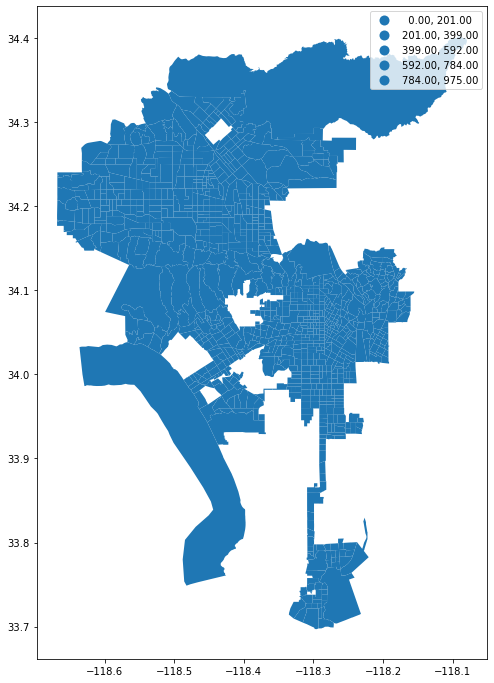

In [57]:
tenure.plot(figsize=(12,12),
                 column='PC_Renters',
                 legend=True, 
                 scheme='NaturalBreaks')

In [58]:
tenure.head()

,geoid,name,B25003001,B25003002,B25003003,geometry,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,...,2019_Occupied Housing Units,2019_Owners,2019_Renters,2010_Occupied Housing Units,2010_Owners,2010_Renters,PC_OccupiedHousingUnits,PC_Owners,PC_Renters,geometry_y
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,843.0,732.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,...,1575,843,732,1693,792,901,-6.96987596,6.439393939,-18.75693674,None
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1072.0,240.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,...,1312,1072,240,1304,1155,149,0.613496933,-7.186147186,61.0738255,None
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,401.0,1896.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,...,2297,401,1896,2175,394,1781,5.609195402,1.776649746,6.457046603,None
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,535.0,822.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,...,1357,535,822,1173,466,707,15.68627451,14.80686695,16.26591231,None
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1255.0,190.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,...,1445,1255,190,1408,1217,191,2.627840909,3.12243221,-0.523560209,None


Okay, I think the issue is that the objects that were in the CSV file are objects and not numeric values. I learned this last time but forgot but I already have the code written up from last time!

In [12]:
tenure['PC_OccupiedHousingUnits'] = tenure['PC_OccupiedHousingUnits'].astype(float)
tenure['PC_Owners'] = tenure['PC_Owners'].astype(float)
tenure['PC_Renters'] = tenure['PC_Renters'].astype(float)

<AxesSubplot:>

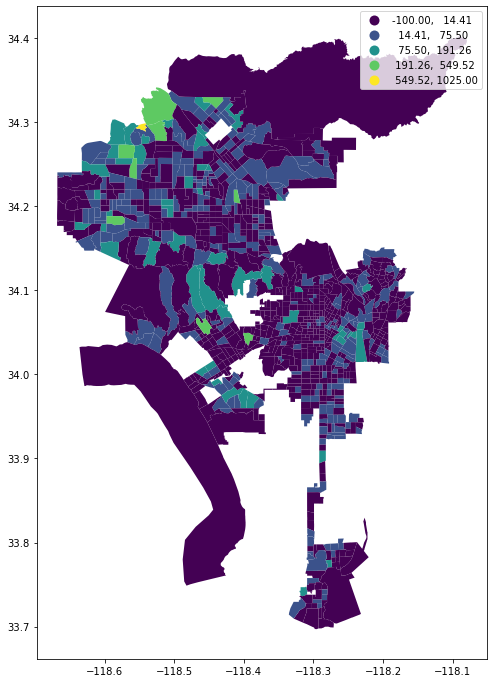

In [63]:
tenure.plot(figsize=(12,12),
                 column='PC_Renters',
                 legend=True, 
                 scheme='NaturalBreaks')

Nice. No I'm going to try to map increase/decrease in renters, as I have done in other homework assignments.

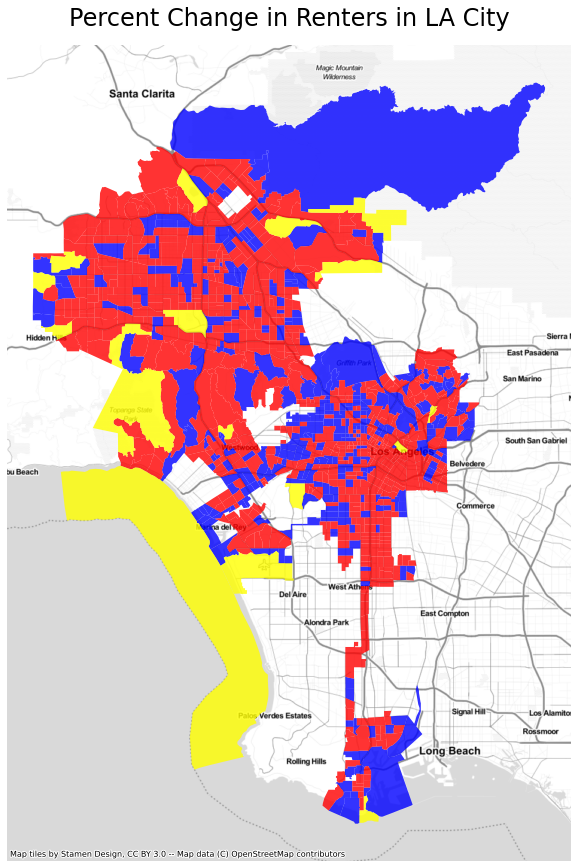

In [29]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
tenure_web_mercator[tenure_web_mercator['PC_Renters'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.8
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.8
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] == 0].plot(                                      
                                                               ax=ax,
                                                               color="yellow",
                                                               alpha=0.8
)


# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Percent Change in Renters in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

I would say this is a great map to visualize increase (red) and decrease (blue) of renters (yellow = 0, NA). Now, to look at owners as well.

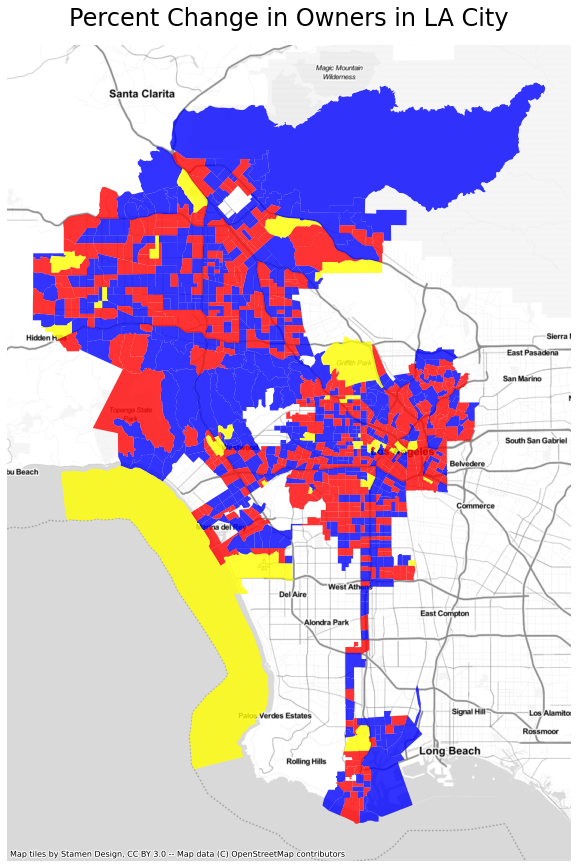

In [30]:
tenure_web_mercator = tenure.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
tenure_web_mercator[tenure_web_mercator['PC_Owners'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.8
)

tenure_web_mercator[tenure_web_mercator['PC_Owners'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.8
)

tenure_web_mercator[tenure_web_mercator['PC_Owners'] == 0].plot(                                      
                                                               ax=ax,
                                                               color="yellow",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Percent Change in Owners in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Also interesting to think about the increase (red)/decrease (blue) in owners. 

# Parks in LA City

I've already mapped the parks in LA during previous assignments so we're just incorporating that assignment into this one so that we can map increase/decrease of renters in census tracts and incorporate the parks map. Here is the link to that assignment https://github.com/arihernandez98/GoAgs/blob/main/GroupAssignments/ArianaWeek4Assignment.ipynb

In [13]:
parks = gpd.read_file('SoCalParks.zip')
parks.to_file('SoCalParks.geojson', driver='GeoJSON')

In [14]:
parks['Park_Name'] = parks ['Park_Name'].astype(str)
parks['Park_Urban'] = parks ['Park_Urban'].astype(str)
parks['Park_Desig'] = parks ['Park_Desig'].astype(str)
parks['Park_Owner'] = parks ['Park_Owner'].astype(str)
parks['Park_Local'] = parks ['Park_Local'].astype(str)
parks['Park_Manag'] = parks ['Park_Manag'].astype(str)
parks['Park_Loc_1'] = parks ['Park_Loc_1'].astype(str)
parks['Park_Statu'] = parks ['Park_Statu'].astype(str)
parks['Park_Est_D'] = parks ['Park_Est_D'].astype(str)
parks['Park_Addre'] = parks ['Park_Addre'].astype(str)
parks['Park_State'] = parks ['Park_State'].astype(str)
parks['Park_Sta_1'] = parks ['Park_Sta_1'].astype(str)
parks['Park_Count'] = parks ['Park_Count'].astype(str)   
parks['Park_Cou_1'] = parks ['Park_Cou_1'].astype(str)     
parks['Park_Place'] = parks ['Park_Place'].astype(str)
parks['Park_Pla_1'] = parks ['Park_Pla_1'].astype(str)   
parks['Park_Urb_1'] = parks ['Park_Urb_1'].astype(str)     
parks['Park_Zip'] = parks ['Park_Zip'].astype(str)
parks['Park_Bound'] = parks ['Park_Bound'].astype(str)   
parks['Park_Sourc'] = parks ['Park_Sourc'].astype(str)     
parks['Park_Feedb'] = parks ['Park_Feedb'].astype(str)
parks['Park_DateA'] = parks ['Park_DateA'].astype(str) 
parks['DataShare_'] = parks ['DataShare_'].astype(str)

Let's make sure it maps!

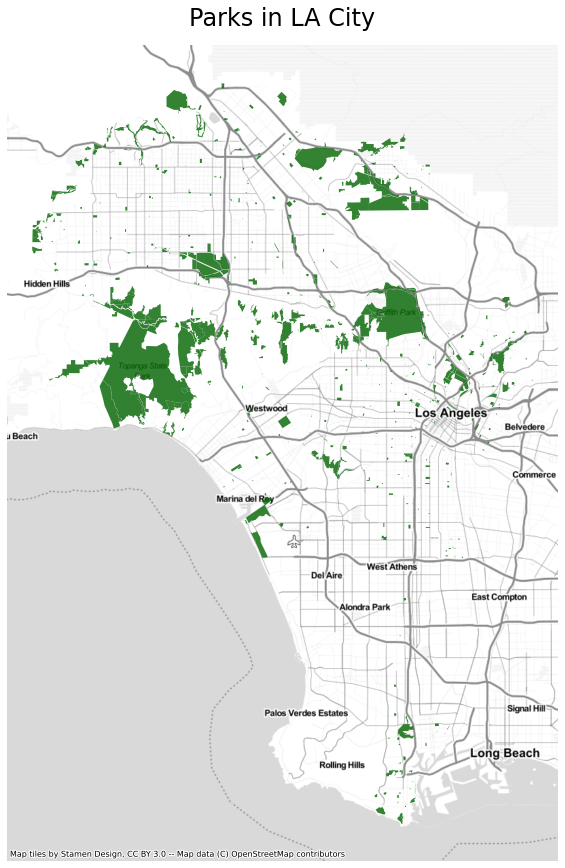

In [15]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha= 0.8 
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Next, I'm going to map the parks with the percent change in renters. Also, I filter the Parks map differently this time compared to the Week 4 assignment. Before, I used '['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA']' but this time around I looked through the data more and saw that ['Park_Place'] == 'Los Angeles city'] is actually more relevant geographically to our project since it is only the city and not the metropolitan area. 

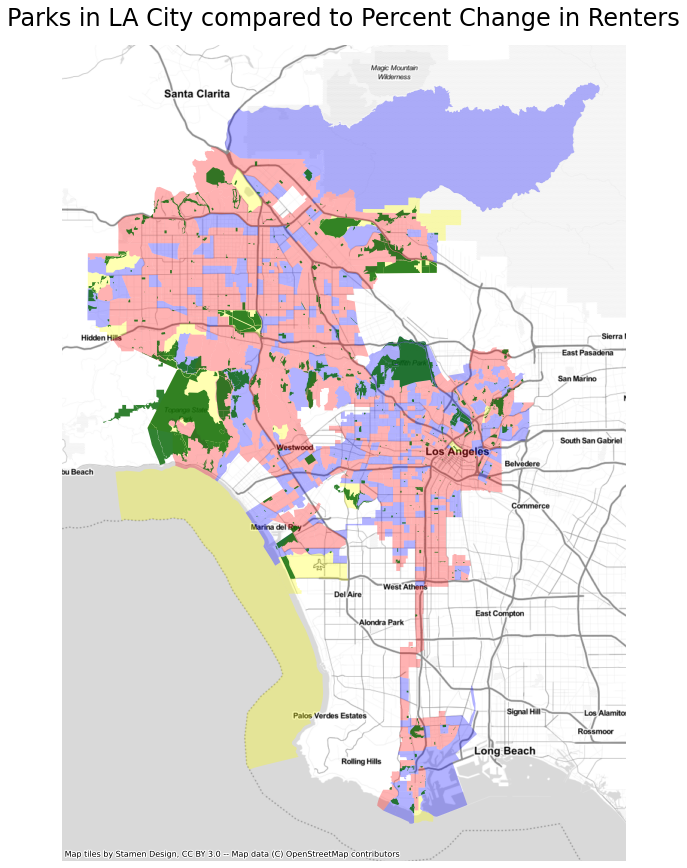

In [24]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 


tenure_web_mercator[tenure_web_mercator['PC_Renters'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Renters'] == 0].plot(                                      
                                                               ax=ax,
                                                               color="yellow",
                                                               alpha=0.3
)

parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha= 0.8 
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City compared to Percent Change in Renters',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Yay success! Apparently in Week 7 we'll do some statistical analysis which will be great for us to see if there is a statistical significance in change in renters to proximity to parks. 

Also, I changed it so that blue = decrease, red = increase, yellow = NA or 0.

Next we'll look at percent owners. 

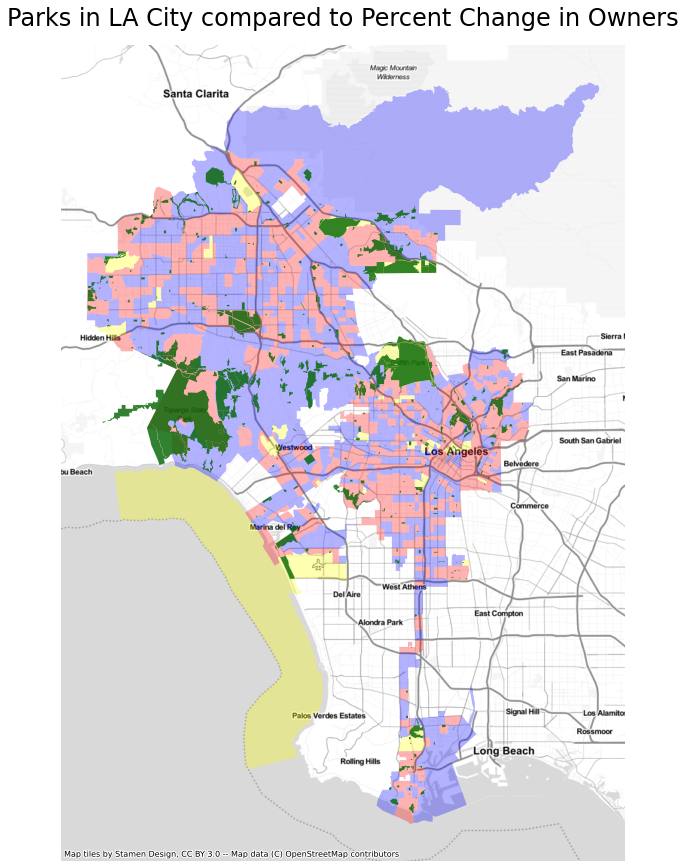

In [25]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 


tenure_web_mercator[tenure_web_mercator['PC_Owners'] < 0].plot(                                      
                                                               ax=ax,
                                                               color="blue",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Owners'] > 0].plot(                                      
                                                               ax=ax,
                                                               color="red",
                                                               alpha=0.3
)

tenure_web_mercator[tenure_web_mercator['PC_Owners'] == 0].plot(                                      
                                                               ax=ax,
                                                               color="yellow",
                                                               alpha=0.3
)

parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha= 0.8 
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City compared to Percent Change in Owners',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

### Division of Labor

Ariana: Tenure and Parks mapping. I calculated the percent change in renters. I also downloaded the parks data from The Trust for Public Land's website and figured out how to only map the City of LA.  

Sim: Housing price and Parks mapping. Sim used the FHFA data to calculate the percent change in housing prices from 2010 to 2019.
